In [1]:
# Importing libraries
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sn

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

In [2]:
# Importing the data
import glob # To access the files names in the repertory
from google.colab import files

#Checking file existence
filename = glob.glob("pollen.zip")
if len(filename) == 0:
  uploaded = files.upload()
#Importing in data frame
# df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
# df

Saving pollen.zip to pollen.zip


The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [7]:
# Loading the data
import os
import zipfile

local_zip = '/content/pollen.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall() #'only_pollen'
%rm -r "/content/__MACOSX"             #Uncomment 

zip_ref.close()

In [4]:
# !rm -r "/content/__MACOSX"
# !ls

In [4]:
# Directory with our training pictures
train_dir = os.path.join('/content/pollen/train/') 

# Directory with our testing  pictures
test_dir = os.path.join('/content/pollen/test/')

# Directory with our validation pictures
valid_dir = os.path.join('/content/pollen/valid/')


In [6]:
train_dir

'/content/pollen/train/'

Let's see what the filenames look like

In [8]:
%rm -r "/content/pollen/train/.DS_Store"
%rm -r "/content/pollen/test/.DS_Store"
%rm -r "/content/pollen/valid/.DS_Store"

train_names = os.listdir(train_dir)#[:2]
print(train_names[:10])

test_names = os.listdir(test_dir)#[:2]
print(train_names[:10])

validation_hames = os.listdir(valid_dir)#[:2]
print(validation_hames[:10])


['empty', 'pollen']
['empty', 'pollen']
['empty', 'pollen']


In [9]:
# %rm -r /content/pollen/train/data
# %rm -r /content/pollen/test/data
# %rm -r /content/pollen/valid/data

In [9]:
# Let's merge data by subset

# %cp -a "/content/pollen/train/empty/." "/content/pollen/train/data"
# %cp -a "/content/pollen/train/pollen/." "/content/pollen/train/data"

# %cp -a "/content/pollen/test/empty/." "/content/pollen/test/data"
# %cp -a "/content/pollen/test/pollen/". "/content/pollen/test/data"


# %cp -a "/content/pollen/valid/empty/." "/content/pollen/valid/data"
# %cp -a "/content/pollen/valid/pollen/." "/content/pollen/valid/data"


In [10]:
# Let's now update the path of the training, test, and validation data by the merged ones
# Directory with our training pictures
# train_dir = os.path.join('/content/pollen/train/data') 

# # Directory with our testing  pictures
# test_dir = os.path.join('/content/pollen/test/data')

# # Directory with our validation pictures
# valid_dir = os.path.join('/content/pollen/valid/data')

In [10]:
# train_names = os.listdir(train_dir)
# print(train_names[:10])

# test_names = os.listdir(test_dir)
# print(train_names[:10])

# validation_hames = os.listdir(valid_dir)
# print(validation_hames[:10])

Let's find out the total number of images in the directories:

In [12]:
count_train_im = len(os.listdir(train_dir + "/pollen")) + len(os.listdir(train_dir + "/empty"))
count_test_im = len(os.listdir(test_dir + "/pollen")) + len(os.listdir(test_dir + "/empty"))
count_valid_im = len(os.listdir(valid_dir + "/pollen")) + len(os.listdir(valid_dir + "/empty"))


print('total training images:', count_train_im)
print('total test images:', count_test_im)
print('total validation images:', count_valid_im)


total training images: 912
total test images: 50
total validation images: 90


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [14]:
train_dir

'/content/pollen/train'

In [15]:
#next_image_pic

empty
/content/pollen/train/empty/*.jpg


FileNotFoundError: ignored

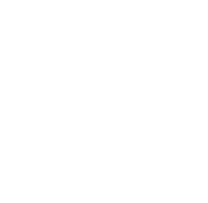

In [20]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_image_pic = [os.path.join(train_dir, os.path.join(fname +"/*.jpg")) 
                for fname in train_names]
for fname in train_names:
  print(fname)
  break


for i, img_path in enumerate(next_image_pic):
  # Set up subplot; subplot indices start at 1
  print(img_path)
  if i+1 <= nrows*ncols:
    sp = plt.subplot(nrows, ncols, i + 1)
  # else:
  #   sp = plt.subplot(nrows, ncols, i)
  sp.axis('Off') # Don't show axes (or gridlines)

  #try:
  img = mpimg.imread(img_path) # here read the image from the path 
  plt.imshow(img)   # here dispaly the read image
  plt.title(os.path.basename(os.path.split(img_path)[0])) # try to extract the name of class from the image path

plt.show()

In [ ]:
%rm '/content/only_pollen/train/.DS_Store'

In [ ]:
#! cd only_pollen/train && ls 

In [28]:
img = plt.imread("/content/pollen/train/data/2022-05-05_174902_2_jpg.rf.8d648c03b8a722cc9553e8f568b0f6f4.jpg")
plt.axis("off")
plt.imshow(img)

FileNotFoundError: ignored

# Implemeting a classification model using TensorFlow

In [21]:
# Importing tensorflow and other libraries

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Create a dataset

In [22]:
# Parameter configuration
batch_size = 32
img_height = 180
img_width = 180

In [23]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 910 files belonging to 2 classes.
Using 728 files for training.


In [24]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 910 files belonging to 2 classes.
Using 182 files for validation.


In [25]:
class_names = train_ds.class_names
print(class_names)

['empty', 'pollen']


## Visualize the data

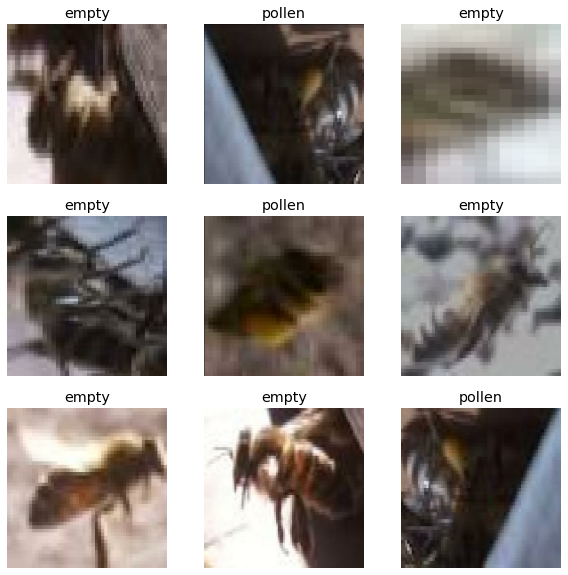

In [26]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [27]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


## Configure the dataset for performance

In [28]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## A basic Keras model

The Keras Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them. There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu'). This model has not been tuned for high accuracy; the goal of this tutorial is to show a standard approach.

In [29]:
num_classes = len(class_names)

model0 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compil the model
- **Optimizer**: tf.keras.optimizers.Adam
- **Loss function**: tf.keras.losses.SparseCategoricalCrossentropy


In [30]:
model0.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

#tf.keras.metrics.AUC

## Model summary
View all the layers of the network using the Keras Model.summary method:

In [31]:
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

## Training the model
- Number of epochs: 10

In [91]:
epochs=10
history = model0.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
23/23 [==============================] - 30s 1s/step - loss: 0.6521 - accuracy: 0.6456 - val_loss: 0.5997 - val_accuracy: 0.7253
Epoch 2/10
23/23 [==============================] - 32s 1s/step - loss: 0.5659 - accuracy: 0.7047 - val_loss: 0.5329 - val_accuracy: 0.7857
Epoch 3/10
23/23 [==============================] - 29s 1s/step - loss: 0.4591 - accuracy: 0.8063 - val_loss: 0.5097 - val_accuracy: 0.7967
Epoch 4/10
23/23 [==============================] - 29s 1s/step - loss: 0.4104 - accuracy: 0.8297 - val_loss: 0.3810 - val_accuracy: 0.8736
Epoch 5/10
23/23 [==============================] - 29s 1s/step - loss: 0.2724 - accuracy: 0.8764 - val_loss: 0.3408 - val_accuracy: 0.8626
Epoch 6/10
23/23 [==============================] - 31s 1s/step - loss: 0.2139 - accuracy: 0.9135 - val_loss: 0.4042 - val_accuracy: 0.8571
Epoch 7/10
23/23 [==============================] - 28s 1s/step - loss: 0.2054 - accuracy: 0.9299 - val_loss: 0.2449 - val_accuracy: 0.9176
Epoch 8/10
23/23 [==

## Visualize training results
Create plots of the loss and accuracy on the training and validation sets:




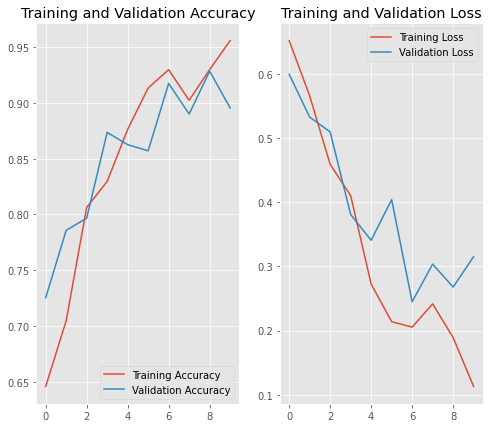

In [92]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Comment on first training results

- The difference between the training and validation performances is **big and thus, it could imply an Overfitting.**

- **SOLUTION**
  There are many ways to fight overfitting in the training process. We are going to try **data augmentation** & **adding dropout in the model**

We will implement data augmentation using the following Keras preprocessing layers: 
    
    tf.keras.layers.RandomFlip, tf.keras.layers.RandomRotation, and tf.keras.layers.RandomZoom. 
  These can be included inside your model like other layers, and run on the GPU.

In [93]:
data_augmentation = keras.Sequential(
  [layers.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1), layers.RandomZoom(0.1)])


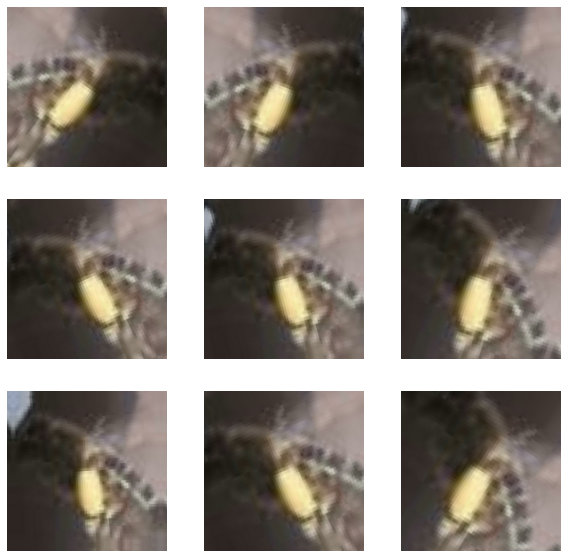

In [94]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Building a new model with dropout regularization to be trained on augmented data 

In [95]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

## Compile and train the model

In [96]:
model.compile(optimizer='adam',
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [98]:
# Training
epochs = 15
history = model.fit( train_ds,
                     validation_data=val_ds,
                     epochs=epochs)

Epoch 1/15


23/23 [==============================] - 38s 1s/step - loss: 0.8290 - accuracy: 0.5069 - val_loss: 0.7596 - val_accuracy: 0.5385
Epoch 2/15
23/23 [==============================] - 33s 1s/step - loss: 0.6787 - accuracy: 0.5810 - val_loss: 0.6453 - val_accuracy: 0.6484
Epoch 3/15
23/23 [==============================] - 34s 1s/step - loss: 0.6384 - accuracy: 0.6745 - val_loss: 0.6207 - val_accuracy: 0.6813
Epoch 4/15
23/23 [==============================] - 34s 1s/step - loss: 0.5789 - accuracy: 0.7170 - val_loss: 0.7031 - val_accuracy: 0.5934
Epoch 5/15
23/23 [==============================] - 33s 1s/step - loss: 0.5491 - accuracy: 0.7349 - val_loss: 0.5171 - val_accuracy: 0.7967
Epoch 6/15
23/23 [==============================] - 34s 1s/step - loss: 0.4572 - accuracy: 0.7995 - val_loss: 0.4498 - val_accuracy: 0.8187
Epoch 7/15
23/23 [==============================] - 32s 1s/step - loss: 0.4427 - accuracy: 0.7843 - val_loss: 0.4180 - val_accuracy: 0.8297
Epoch 8/15
23/23 [=============

## Visualize training results

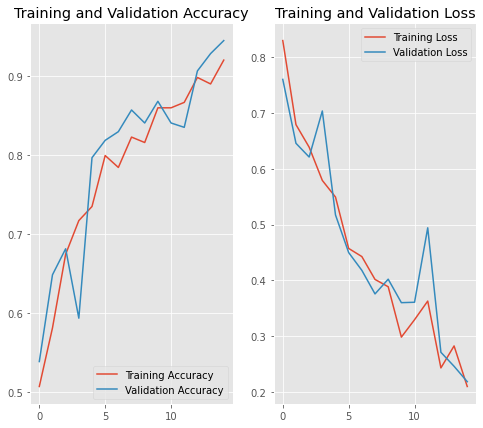

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict on new data
Use the model to classify an image that wasn't included in the training or validation sets

In [100]:
path = "/content/pollen/test/empty/2022-05-27_153757_2_jpg.rf.4f53c87dbc8407a4e185a8e8c96ea319.jpg"
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to class \"{}\" with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 160ms/step
This image most likely belongs to class "empty" with a 95.85 percent confidence.


In [101]:
path = "/content/pollen/test/pollen/2022-05-27_164951_5_jpg.rf.4c7721f82f0a93c5a061f029779edcff.jpg"
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to class \"{}\" with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 38ms/step
This image most likely belongs to class "pollen" with a 98.74 percent confidence.


## Infering on a merge set of data

In [102]:
%cp -a "/content/pollen/valid/empty/." "/content/pollen/valid/data"
%cp -a "/content/pollen/valid/pollen/." "/content/pollen/valid/data"

In [103]:
def classify_folder(path):
  """ This function allow to classify a set of images
  - Take all images in the folder 
  - Infer their label
  - Classify the image according to the label predicted"""
  directory = os.path.join(path)
  files_names = os.listdir(directory)
  classe_names = os.listdir(directory)


  images_paths = [os.path.join(directory, fname) 
                    for fname in files_names]
  
  pollen_dir = "/content/pollen/valid/classification/pollen/"
  empty_dir = "/content/pollen/valid/classification/empty/"

  os.system(f"mkdir {pollen_dir} {empty_dir}")

  # Setting the current working directory
  os.chdir('/content/')

  # Setting the source and the destination folders
  # src_pollen = os.getcwd() + path
  # dst_pollen = os.getcwd() + pollen_dir
  # dst_empty = os.getcwd() + empty_dir

  src_pollen = path
  dst_pollen = pollen_dir
  dst_empty = empty_dir

  #print(src_pollen,dst_pollen,dst_empty)


  for img in images_paths:
    # print(img)
    img_path = img
    img = tf.keras.utils.load_img(img,
                                  target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    if class_names[np.argmax(score)] == "pollen":
      #%cp -a os.path.join(img) pollen_dir
        # copy file
      cmd = f"cp -f {img_path} {dst_pollen}"
      os.system(cmd)
    else:
      if class_names[np.argmax(score)] == "empty":
        #%cp -a os.path.join(img) empty_dir
        cmd = f"cp -f {img_path} {dst_empty}"
        os.system(cmd)
        
      else:
        print("Unknown file's label!")
  count_pollen = len(os.listdir(dst_pollen))
  count_empty = len(os.listdir(dst_empty))
  print('Total of images with pollen:', count_pollen)
  print('Total of images without pollen:', count_empty)
  
  # we can also zip the folder to download it
  !zip -r /content/pollen/valid/classification.zip /content/pollen/valid/classification
  
  from google.colab import files
  files.download("/content/pollen/valid/classification.zip")

  return count_pollen, count_empty

In [104]:
# %rm -r "/content/pollen/valid/classification/pollen/"
# %rm -r "/content/pollen/valid/classification/empty/"

In [105]:
path = "/content/pollen/valid/data"
classify_folder(path)

1/1 [==============================] - 0s 35ms/step
Total of images with pollen: 35
Total of images without pollen: 65
updating: content/pollen/valid/classification/ (stored 0%)
updating: content/pollen/valid/classification/pollen/ (stored 0%)
updating: content/pollen/valid/classification/pollen/2022-05-27_174057_4_jpg.rf.4bc0fbb9bfc016aba075b82f5fb8b5ab.jpg (deflated 1%)
updating: content/pollen/valid/classification/pollen/2022-05-27_173045_3_jpg.rf.dc00772d37397bea8f68b40a071ab77c.jpg (deflated 2%)
updating: content/pollen/valid/classification/pollen/2022-05-30_180433_2_jpg.rf.a0f6e7ef56d14b8f1454abcb746c21ff.jpg (deflated 2%)
updating: content/pollen/valid/classification/pollen/2022-05-30_192114_2_jpg.rf.4bd4921427e0287ea5a19680ab504c34.jpg (deflated 3%)
updating: content/pollen/valid/classification/pollen/2022-05-28_030257_4_jpg.rf.8f66fc56051b5c9f7b1702230cc2e4eb.jpg (deflated 3%)
updating: content/pollen/valid/classification/pollen/2022-05-28_035912_2_jpg.rf.fa5cbb3d5fe8407fc18da

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(35, 65)

In [106]:
# Teacher proposition

# SKimage
# Imgaug